In [ ]:
from datascience import *
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Lecture 08: Sampling #

## Sampling Probability Distributions

In [ ]:
#make a die
die = Table().with_column('Face', np.arange(1, 7))
die

In [ ]:
#show the theoretical "probability" distribution
roll_bins = np.arange(0.5, 6.6, 1)
die.hist(bins = roll_bins)

In [ ]:
#the sample fucntion choses x number of rows from a table at random (with replacement)
die.sample(10)

In [ ]:
#Here we demonstrate an empirical distribution and show that by the law of averages if we increase the RANDOM sample size
#the empirical distribution approaches the true probability distribution
#set sample between 10 and 1000000 and see what happens
die.sample(10).hist(bins = roll_bins)

## Sampling Populations##

In [152]:
#Here we make the intelectual jump from dice to data!
united = Table.read_table('united_summer2015.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')

In [153]:
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


In [154]:
united.take(make_array(999, 1000, 1001))

Row,Date,Flight Number,Destination,Delay
999,6/7/15,1684,LIH,-3
1000,6/7/15,1692,EWR,7
1001,6/7/15,1699,ATL,6


In [ ]:
start = np.random.choice(np.arange(1000))
systematic_sample = united.take(np.arange(start, united.num_rows, 1000))
systematic_sample.show()

## Large Random Samples ##

In [155]:
united 

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


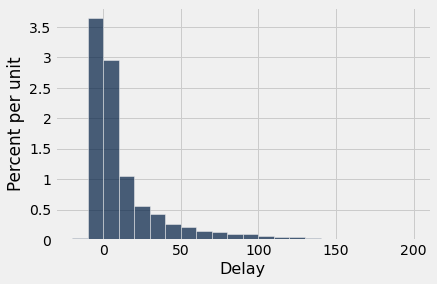

In [156]:
united.hist('Delay', bins = np.arange(-20, 201, 10))

In [157]:
min(united.column('Delay')), max(united.column('Delay'))

(-16, 580)

In [158]:
united.where('Delay', 580)

Row,Date,Flight Number,Destination,Delay
3140,6/21/15,1964,SEA,580


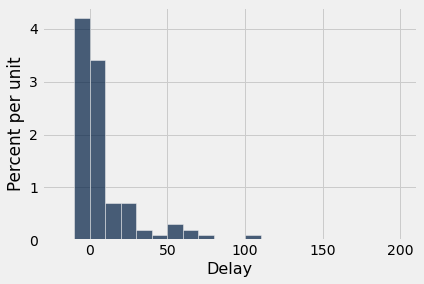

In [170]:
sample = united.sample(100)
sample.hist('Delay', bins = np.arange(-20, 201, 10))

In [171]:
np.mean(sample.column('Delay'))

8.4

In [ ]:
np.mean(united.column('Delay'))

In [ ]:
united.where('Delay', are.below_or_equal_to(2)).num_rows / united.num_rows

In [182]:
x = make_array()
for i in range(1,1000):
    sample = united.sample(10000)
    x = np.append(x,np.mean(sample.column('Delay')))

In [180]:
#larger_sample_sizeis an array of 1000 different sample means, when the sample size is 100

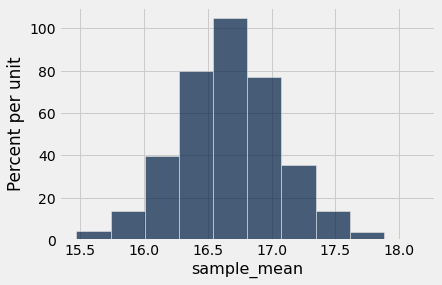

In [183]:
larger_sample_size = Table().with_column("sample_mean", x)
larger_sample_size.hist()

In [ ]:
#x is an array of 1000 different sample means, when the sample size is 10

In [175]:
min(x)

-2.8

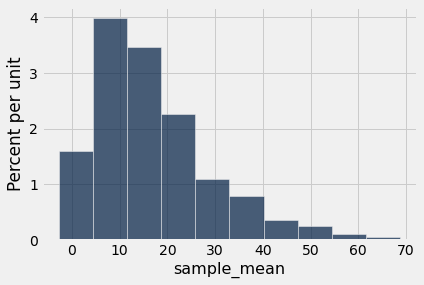

In [176]:
y = Table().with_column("sample_mean", x)
y.hist()

## Calculation, Enumeration, Estimation ##

In [ ]:
die = Table().with_column('Face', np.arange(1, 7))
die

In [ ]:
p=make_array()
rolls=4
samples = 10000
for i in range(samples):
    p=np.append(p,np.sum(die.sample(rolls).column("Face")==6)>0)
p=np.sum(p)/samples
p


In [ ]:
1-(5/6)**20